In [ ]:
import pandas as pd

upload ไฟล์ ex4.csv เข้ามาใน folder แถบซ้าย

In [ ]:
result=pd.read_csv('ex4.csv')  #ในไฟล์ ex4.csv แถว 1 จะมีค่า NA, แถว 2 จะมีค่าว่าง
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,see you


sys.stdout คือ print ออกไปที่หน้าจอคอม, ใช้ตัว | เป็นตัวแบ่งคั่น

In [ ]:
import sys
result.to_csv(sys.stdout,sep='|')  #คั่น data แต่ละตัวด้วย |

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|see you


In [ ]:
result.to_csv(sys.stdout)  #คั่น data แต่ละตัวด้วย ,

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,see you


หน้าที่ 3 คำสั่งที่ 4 write ลงไฟล์ โดยไม่ใส่ index

In [ ]:
result.to_csv('out.csv',index=False)  #ในไฟล์ out.csv ข้อมูลที่เป็น NULL จะเป็นค่าว่าง

In [ ]:
pd.read_csv('out.csv')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,see you


write out1.csv

In [ ]:
result.to_csv('out1.csv')  #ในไฟล์ out1.csv ข้อมูลที่เป็น NULL จะเป็นค่าว่าง
pd.read_csv('out1.csv')

,Unnamed: 0,something,a,b,c,d,message
0,0,one,1,2,3.0,4,NaN
1,1,two,5,6,NaN,8,world
2,2,three,9,10,11.0,12,see you


write out2.csv

In [ ]:
result.to_csv('out2.csv',index=False,columns=['a','b','c','d']) #บันทึกแต่คอลัมน์ a b c d ลงในไฟล์ out2.csv
pd.read_csv('out2.csv')  #ในไฟล์ out2.csv ข้อมูลที่เป็น NULL จะเป็นค่าว่าง

,a,b,c,d
0,1,2,3.0,4
1,5,6,NaN,8
2,9,10,11.0,12


ตรงไหนเป็นช่องว่าง ให้เปลี่ยนเป็นคำว่า NULL

In [ ]:
result.to_csv(sys.stdout,sep='|',na_rep='NULL')

|something|a|b|c|d|message
0|one|1|2|3.0|4|NULL
1|two|5|6|NULL|8|world
2|three|9|10|11.0|12|see you


write out3.csv

ในตัวไฟล์จะมีค่าว่า NULL

แต่ตอนอ่านจะเห็นแค่ NaN

In [ ]:
result.to_csv('out3.csv',na_rep='NULL',index=False) #ในไฟล์ out3.csv ข้อมูลที่เป็น NULL จะเป็นคำว่า NULL
pd.read_csv('out3.csv')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,see you


write ลงใน .txt แต่การเขียนยังเป็นแบบ csv อยู่ ดังนั้นเวลาเปิดไฟล์จะมี comma

In [ ]:
result.to_csv('out4.txt',index=False,header=False)  #ในไฟล์ out4.txt ข้อมูลที่เป็น NULL จะเป็นค่าว่าง
data=pd.read_csv('out4.txt',header=None)
data

,0,1,2,3,4,5
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,see you


ข้อมูลที่ได้จะอยู่ในรูปแบบของ tuple

In [ ]:
import csv
f=open('ex4.csv')
reader=csv.reader(f)
for line in reader:
  print(line)

['something', 'a', 'b', 'c', 'd', 'message']
['one', '1', '2', '3', '4', 'NA']
['two', '5', '6', '', '8', 'world']
['three', '9', '10', '11', '12', 'see you']


wrangling data เป็นการ data cleansing คือ การเตรียมข้อมูลให้พร้อมก่อนเข้าไฟล์

เปิดไฟล์แล้วเก็บไว้ที่ตัวแปร lines

In [ ]:
with open('ex4.csv') as f:
  lines=list(csv.reader(f))

lines[0] เก็บไว้ใน header
lines ตั้งแต่ 1 เป็นต้นไป เก็บไว้ใน values

In [ ]:
header,values=lines[0],lines[1:] #บรรทัดแรกเป็น head บรรทัดที่เหลือเป็น data

In [ ]:
print(header)

['something', 'a', 'b', 'c', 'd', 'message']


In [ ]:
print(values)

[['one', '1', '2', '3', '4', 'NA'], ['two', '5', '6', '', '8', 'world'], ['three', '9', '10', '11', '12', 'see you']]


h คือ header

v for h คือ value ที่บีบอัดกันอยู่

In [ ]:
data_dict={h: v for h, v in zip(header,zip(*values))}
data_dict

{'something': ('one', 'two', 'three'),
 'a': ('1', '5', '9'),
 'b': ('2', '6', '10'),
 'c': ('3', '', '11'),
 'd': ('4', '8', '12'),
 'message': ('NA', 'world', 'see you')}

การกำหนดรูปแบบโดยใช้ dialect

lineterminator	 อักษรที่แทนการขึ้นบรรทัดใหม่  	เช่น  \r\n
delimiter	อักษรที่เป็นตัวกั้น 	เช่น  ,
quotechar 	เครื่องหมายคำพูดที่ใช้ล้อมคำที่มีอักษรพิเศษ เช่น “”
Quoting 	กำหนดว่าจะคร่อมเครื่องหมายคำพูดเมื่อเจอข้อมูลแบบไหนบ้าง


csv.QUOTE_MINIMAL	คร่อมเฉพาะเมื่อเจออักษรที่เป็นตัวกั้น
csv.QUOTE_ALL	คร่อมทั้งหมด
csv.QUOTE_NONNUMERIC	คร่อมเฉพาะที่ไม่ใช่ตัวเลข
csv.QUOTE_NONE	ไม่คร่อมเลย

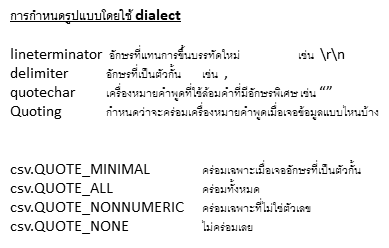

In [ ]:
import csv
f=open('ex4.csv')
class my_dialect(csv.Dialect):
  lineterminator='\n'
  delimiter=';'
  quotechar='"'
  quoting=csv.QUOTE_MINIMAL

reader1=csv.reader(f,dialect=my_dialect)

In [ ]:
for line in reader1:
  print(line)

['something,a,b,c,d,message']
['one,1,2,3,4,NA']
['two,5,6,,8,world']
['three,9,10,11,12,see you']


In [ ]:
import csv  #อ่านโดยไม่ใช้ csv.Dialect
f=open('ex4.csv')
reader=csv.reader(f)
for line in reader:
  print(line)

['something', 'a', 'b', 'c', 'd', 'message']
['one', '1', '2', '3', '4', 'NA']
['two', '5', '6', '', '8', 'world']
['three', '9', '10', '11', '12', 'see you']


In [ ]:
import csv
f=open('ex4.csv')
reader = csv.reader(f, delimiter='|')
for line in reader:
  print(line)

['something,a,b,c,d,message']
['one,1,2,3,4,NA']
['two,5,6,,8,world']
['three,9,10,11,12,see you']


การเขียนใหม่ แบบทีละแถว (writerow)

In [ ]:
with open('mydata.csv','w') as f:
  writer=csv.writer(f,dialect=my_dialect)
  writer.writerow(('one','two','three'))
  writer.writerow(('1','2','3'))
  writer.writerow(('4','5','6'))
  writer.writerow(('7','8','9'))

ตัวคั้น คือ delimiter = " ; "

In [ ]:
f1=open('mydata.csv')
reader=csv.reader(f1)
for line in reader:
  print(line)

['one;two;three']
['1;2;3']
['4;5;6']
['7;8;9']


## JSON

In [ ]:
obj="""
{"name":"Wes",
"places_lived":["United States","Spain","Germany"],
"pet":null,
"siblings": [{"name":"Scott","age":30,"pets":["Zeus","Zuko"]},
{"name":"Katie","age":38,
"pets":["Sixes","Stache","Cisco"]}]
}
"""

In [ ]:
import json
result=json.loads(obj) #แปลงข้อความ json เป็น object
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [ ]:
asjson=json.dumps(result) #แปลง obj เป็นข้อความ json
asjson

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

In [ ]:
siblings=pd.DataFrame(result['siblings'],columns=['name','age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [ ]:
siblings1=pd.DataFrame(result['siblings'],columns=['name','pets'])
siblings1

,name,pets
0,Scott,"[Zeus, Zuko]"
1,Katie,"[Sixes, Stache, Cisco]"


upload example.json

In [ ]:
import pandas as pd
import numpy as np
import io

from google.colab import files
uploaded=files.upload()

Saving example.json to example.json


In [ ]:
data=pd.read_json('example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [ ]:
print(data.to_json(orient='records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


## Slide 2

เปิด cmd.exe

สร้างไฟล์ข้อมูลจากคำสั่ง echo ใน cmd.exe

สร้างไฟล์ที่มีคำว่า "hello"
echo "hello" > d:\fileout.txt

เพิ่มคำว่า "hello" ลงในไฟล์
echo "hello" >> d:\fileout.txt

In [ ]:
from google.colab import files

upload ex1.csv

In [ ]:
uploaded=files.upload()

Saving ex1.csv to ex1.csv


In [ ]:
import pandas as pd
df=pd.read_csv('ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,see you


In [ ]:
import io
sample_df=pd.read_csv(io.StringIO(uploaded['ex1.csv'].decode('utf8')))
sample_df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,see you


In [ ]:
# ดูข้อมูลว่ามีอะไรบ้าง
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   a        3 non-null      int64 
 1   b        3 non-null      int64 
 2   c        3 non-null      int64 
 3   d        3 non-null      int64 
 4   message  3 non-null      object
dtypes: int64(4), object(1)
memory usage: 248.0+ bytes


In [ ]:
s="""
p_id,name,name_en,region,area_km2
กจ,กาญจนบุรี,Kanchanaburi,C,19483.148
กทม,กรุงเทพมหานคร,Bangkok,C,1568.737
จบ,จันทบุรี,Chanthaburi,C,6338.0
ฉช,ฉะเชิงเทรา,Chachengsao,C,5351.0
"""

In [ ]:
# ให้ s เป็น parameter
import pandas as pd
df=pd.read_csv(io.StringIO(s))
df

,p_id,name,name_en,region,area_km2
0,กจ,กาญจนบุรี,Kanchanaburi,C,19483.148
1,กทม,กรุงเทพมหานคร,Bangkok,C,1568.737
2,จบ,จันทบุรี,Chanthaburi,C,6338.000
3,ฉช,ฉะเชิงเทรา,Chachengsao,C,5351.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   p_id      4 non-null      object 
 1   name      4 non-null      object 
 2   name_en   4 non-null      object 
 3   region    4 non-null      object 
 4   area_km2  4 non-null      float64
dtypes: float64(1), object(4)
memory usage: 288.0+ bytes


upload dat1.txt

In [ ]:
uploaded=files.upload()

Saving dat1.txt to dat1.txt


In [ ]:
pd.read_csv('dat1.txt')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world


In [ ]:
pd.read_csv('dat1.txt',header=None)

,0,1,2,3,4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world


สร้าง folder examples ใน content

แล้ว upload ex2.csv เข้าไป

In [ ]:
pd.read_csv('examples/ex2.csv',names=['a','b','c','d','message'])  #สร้าง folder examples ก่อน แล้ว upload ไฟล์ ex2.csv ไปไว้

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
names=['a','b','c','d','message']

In [ ]:
pd.read_csv('examples/ex2.csv',names=names,index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


upload csv_mindex.csv

In [ ]:
uploaded=files.upload()  #upload ไฟล์ csv_mindex.cs

Saving csv_mindex.csv to csv_mindex.csv


hierachy index เหมือนเป็นการแตกกิ่งก้านออกไป

In [ ]:
parsed=pd.read_csv('csv_mindex.csv',index_col=['key1','key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

upload ex5.csv

In [ ]:
uploaded=files.upload()  #upload ไฟล์ ex5.csv

Saving ex5.csv to ex5.csv


In [ ]:
pd.read_csv('ex5.csv',skiprows=[0,2,3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,see you


upload ex6.csv

In [ ]:
# อาจารย์ข้าม

data selection with index

In [ ]:
import pandas as pd
import numpy as np
from numpy.random import randn
np.random.seed(101) #ใช้ np.random.RandomState(42) แทนได้โดยไม่ต้องจำหมายเลข seed

In [ ]:
arr=np.array([[2.7, 0.6, 0.9,0.5],[0.6, -0.3, -0.8,0.6],[-2.0, 0.7, 0.5,-0.5],[0.1, -0.7, -0.9,0.9],[0.1, 1.9, 2.6,0.6]])

In [ ]:
df=pd.DataFrame(arr,index='A B C D E'.split(),columns='W X Y Z'.split())
df

,W,X,Y,Z
A,2.7,0.6,0.9,0.5
B,0.6,-0.3,-0.8,0.6
C,-2.0,0.7,0.5,-0.5
D,0.1,-0.7,-0.9,0.9
E,0.1,1.9,2.6,0.6


In [ ]:
df['W'] # ดึงมาเฉพาะ column W

A    2.7
B    0.6
C   -2.0
D    0.1
E    0.1
Name: W, dtype: float64

In [ ]:
df[['W','Z']]

,W,Z
A,2.7,0.5
B,0.6,0.6
C,-2.0,-0.5
D,0.1,0.9
E,0.1,0.6


In [ ]:
# เพิ่ม column ชื่อว่า new
df['new']=df['W']+df['Y']
df

,W,X,Y,Z,new
A,2.7,0.6,0.9,0.5,3.6
B,0.6,-0.3,-0.8,0.6,-0.2
C,-2.0,0.7,0.5,-0.5,-1.5
D,0.1,-0.7,-0.9,0.9,-0.8
E,0.1,1.9,2.6,0.6,2.7


In [ ]:
df['new2']=df['W'].add(df['Y']) #ให้ผลเหมือนคำสั่งด้านบน
df

,W,X,Y,Z,new,new2
A,2.7,0.6,0.9,0.5,3.6,3.6
B,0.6,-0.3,-0.8,0.6,-0.2,-0.2
C,-2.0,0.7,0.5,-0.5,-1.5,-1.5
D,0.1,-0.7,-0.9,0.9,-0.8,-0.8
E,0.1,1.9,2.6,0.6,2.7,2.7


In [ ]:
df2=df.drop('new',axis=1)  #ไม่ได้ลบจาก df ต้นทาง
df2

,W,X,Y,Z,new2
A,2.7,0.6,0.9,0.5,3.6
B,0.6,-0.3,-0.8,0.6,-0.2
C,-2.0,0.7,0.5,-0.5,-1.5
D,0.1,-0.7,-0.9,0.9,-0.8
E,0.1,1.9,2.6,0.6,2.7


In [ ]:
df # จะเห็นได้ว่า new ยังไม่ถูกลบ

,W,X,Y,Z,new,new2
A,2.7,0.6,0.9,0.5,3.6,3.6
B,0.6,-0.3,-0.8,0.6,-0.2,-0.2
C,-2.0,0.7,0.5,-0.5,-1.5,-1.5
D,0.1,-0.7,-0.9,0.9,-0.8,-0.8
E,0.1,1.9,2.6,0.6,2.7,2.7


In [ ]:
# แบบนี้จะลบที่ตัวเองด้วย inplace=True
df.drop('new',axis=1,inplace=True) #การลบโดยระบุ inplace = True จะลบข้อมูลนั้นออกจากต้นทาง
df

In [ ]:
df.drop('E',axis=0)

,W,X,Y,Z,new,new2
A,2.7,0.6,0.9,0.5,3.6,3.6
B,0.6,-0.3,-0.8,0.6,-0.2,-0.2
C,-2.0,0.7,0.5,-0.5,-1.5,-1.5
D,0.1,-0.7,-0.9,0.9,-0.8,-0.8


## Group by

In [ ]:
import pandas as pd
data={'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
      'Person':['Sam','Charlie','Amy','Venessa','Carl','Search'],
      'Sales':[200,120,340,124,243,350],}

In [ ]:
df=pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Venessa,124
4,FB,Carl,243
5,FB,Search,350


In [ ]:
by_comp=df.groupby("Company")

In [ ]:
by_comp # ไม่เห็นอะไรแต่ สามารถนำไป คำนวณได้

In [ ]:
by_comp.mean()

<ipython-input-74-15ce3fbdee9c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_comp.mean()


,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [ ]:
df.groupby('Company').mean()

<ipython-input-75-09ffb8aea42a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Company').mean()


,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [ ]:
# .head() ข้อมูล 5 ลําดับแรก
# .tail(3) ขอมูล 3 ลําดับสุดทาย